# KIC 4448777

Using p-mode frequencies determinied in Di Mauro 2015.

In [3]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

In [4]:
ast.style.use("asterion-light")

In [5]:
# Di Mauro (2015)
nu_max = (220.0, 3.0)  # in microhertz
delta_nu = (16.97, 0.05)   # in microhertz
teff = (4750, 250)    # in Kelvin

nu = [159.842,  176.277,  192.907, 209.929, 226.831,  243.879,  261.215]
nu_err = [0.014, 0.018, 0.016, 0.014, 0.014, 0.013, 0.034]

In [6]:
n = np.floor(np.divide(nu, delta_nu[0]) - 1.2)
print(n)

[ 8.  9. 10. 11. 12. 13. 14.]


In [7]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

In [8]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

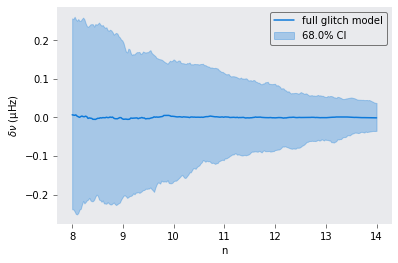

In [9]:
ast.plot_glitch(prior_data, group='prior');

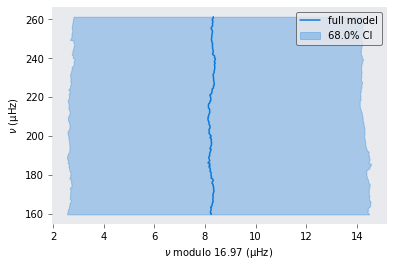

In [10]:
ast.plot_echelle(prior_data, group='prior');

In [11]:
infer.sample()
infer.posterior_predictive()

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...


/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:293: FutureWarning: jax.tree_map is deprecated, and will be removed in a future release. Use jax.tree_util.tree_map instead.
  x_dead_new = tree_map(lambda x: x[i_min], state.live_points_X)
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:550: FutureWarning: jax.tree_multimap is deprecated, and will be removed in a future release. Use jax.tree_util.tree_multimap instead.
  live_points_U = tree_multimap(
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jax/_src/tree_util.py:205: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:553: FutureWarning

Completed in 16.8 seconds.


In [12]:
data = infer.get_data()

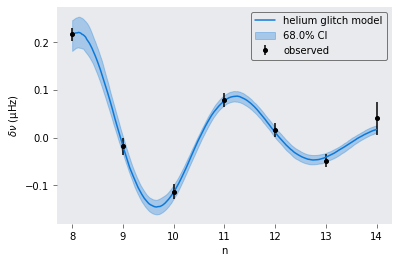

In [13]:
ast.plot_glitch(data, kind='He');

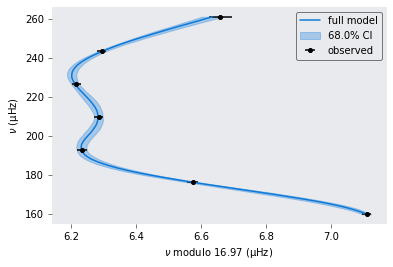

In [14]:
ast.plot_echelle(data);

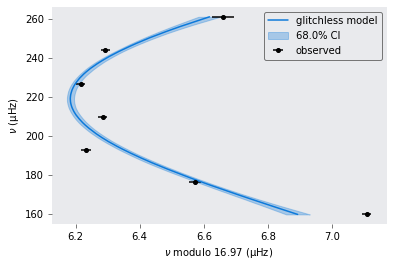

In [15]:
ast.plot_echelle(data, kind='glitchless');

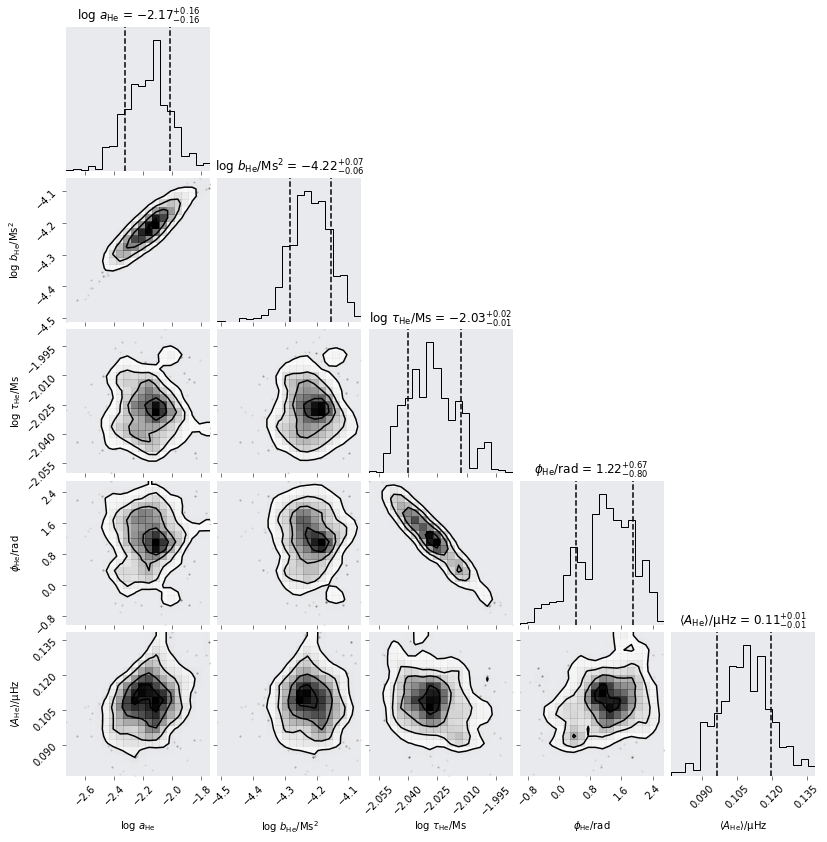

In [16]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

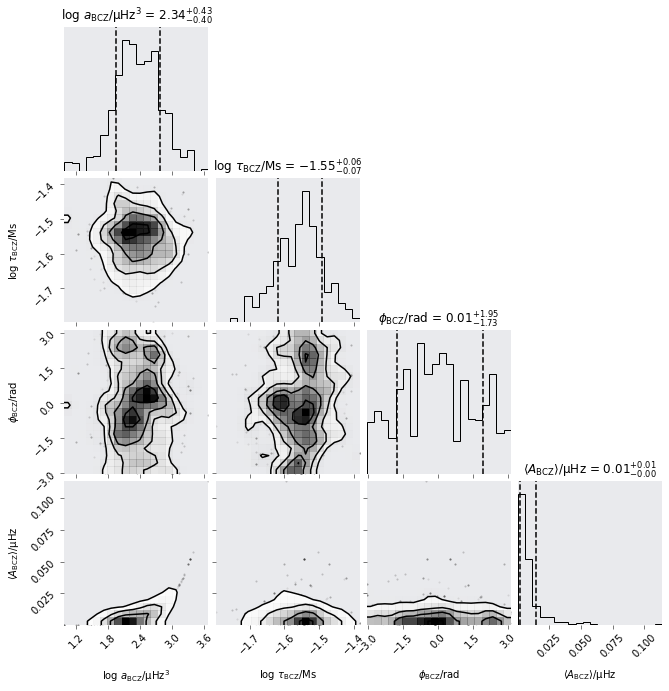

In [17]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz', 'cz_amplitude']);